# Import necessary libraries

In [2]:
import os
import numpy as np
import pandas as pd
import shutil
import random
from skimage import color, io, feature, exposure
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix,roc_curve,auc
from sklearn.model_selection import train_test_split, GridSearchCV,cross_val_score,StratifiedKFold
from sklearn.preprocessing import StandardScaler, LabelEncoder,label_binarize
from sklearn.decomposition import PCA
import seaborn as sns
from itertools import cycle

# Function to extract HOG features from an image 

In [2]:
# Function to extract HOG features from an image and visualize it
# def extract_hog_features(image):
#     # Calculate HOG features
#     hog_features, hog_image  = feature.hog(image, orientations=8, pixels_per_cell=(16, 16),
#     cells_per_block=(1, 1), visualize=True, channel_axis=-1)

#     # Enhance the contrast of the HOG image for better visualization
#     hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 10))

#     return hog_features, hog_image_rescaled

In [3]:

# Function to extract HOG features from an image and visualize it
def extract_hog_features_gray(image):
    # Convert the image to grayscale
    gray_image = color.rgb2gray(image)

    # Calculate HOG features
    hog_features, hog_image = feature.hog(gray_image, visualize=True)

    # Enhance the contrast of the HOG image for better visualization
    hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 10))

    return hog_features, hog_image_rescaled

# Define dataset path and showing image and feature extracted

HOG Features Shape for 0022d6b7-d47c-4ee2-ae9a-392a53f48647___JR_B.Spot 8964.JPG: (72900,)


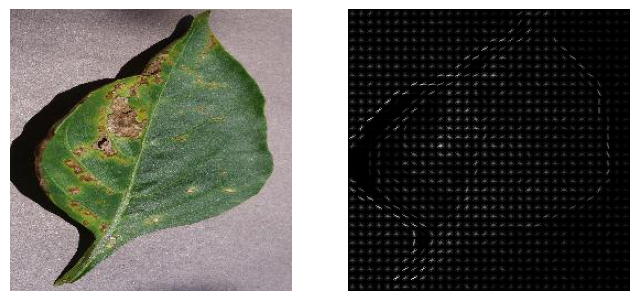

HOG Features Shape for 001187a0-57ab-4329-baff-e7246a9edeb0___RS_Early.B 8178.JPG: (72900,)


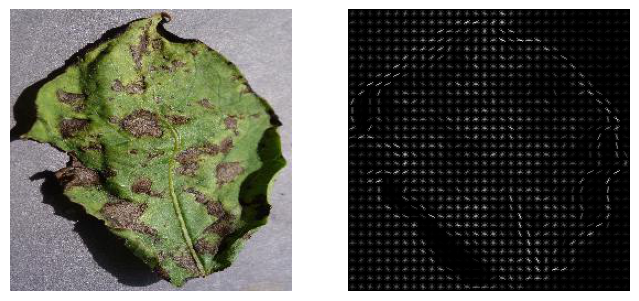

HOG Features Shape for 0051e5e8-d1c4-4a84-bf3a-a426cdad6285___RS_LB 4640.JPG: (72900,)


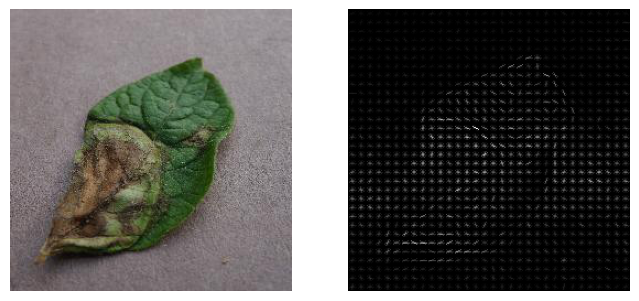

In [4]:
dataset_path = 'leafesv2'
# List all subdirectories (assuming each subdirectory corresponds to a class)
class_folders = [f.path for f in os.scandir(dataset_path) if f.is_dir()]
features_list=[]
img_name =[]
labels_list=[]

# Loop through each class folder
for class_folder in class_folders:
    class_name = os.path.basename(class_folder)

# Loop through each image in the class folder
    
    for inx,image_filename in enumerate(os.listdir(class_folder)):
        if inx==1:
            break
            
        image_path = os.path.join(class_folder, image_filename)

        # Load the image
        image = io.imread(image_path)

        # Extract HOG features and visualize
        hog_features, hog_image = extract_hog_features_gray(image)

        # # Print the dimensions of the HOG features
        print(f"HOG Features Shape for {image_filename}: {hog_features.shape}")

        # Display the original image and the HOG features
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4), sharex=True, sharey=True)

        ax1.axis('off')
        ax1.imshow(image, cmap=plt.cm.gray)

        ax2.axis('off')
        ax2.imshow(hog_image, cmap=plt.cm.gray)

        plt.show()

        
        # Append HOG features to the features list
        features_list.append(hog_features)
        img_name.append(image_path)

        # Append the label to the labels list
        labels_list.append(class_name)

# Convert lists to NumPy arrays and reshape

In [5]:
image_data = np.array(features_list).reshape(len(features_list), -1)
print(image_data.shape)

(2997, 72900)


In [6]:
# scaler = StandardScaler()
# image_data_standardized = scaler.fit_transform(image_data)
# # Apply PCA
# num_components=640# Adjust the number of components based on your requirements
# pca = PCA(n_components=num_components)
# image_data_pca = pca.fit_transform(image_data_standardized)

# convert labels to numeric labels

In [7]:
# x
features_array =image_data
# y
labels_array = np.array(labels_list)
# Use LabelEncoder to convert class names into numeric labels
label_encoder = LabelEncoder()
# y_encoded
numeric_labels = label_encoder.fit_transform(labels_array)
print(features_array)
print(numeric_labels)

[[0.13739726 0.07441883 0.03441649 ... 0.02964206 0.00692922 0.04773718]
 [0.16132661 0.03613854 0.05922865 ... 0.0099702  0.06122027 0.03173534]
 [0.21208026 0.01447099 0.02566966 ... 0.05140353 0.00704572 0.01299166]
 ...
 [0.11863485 0.10419444 0.17479932 ... 0.17049304 0.12627666 0.08195246]
 [0.1344008  0.02693864 0.08664923 ... 0.04118979 0.07622719 0.06161429]
 [0.2050814  0.06500532 0.04202302 ... 0.06079496 0.05283477 0.00503488]]
[0 0 0 ... 2 2 2]


In [8]:
print(np.array(features_array).shape)

(2997, 72900)


# Split the dataset into training and testing sets

In [9]:
X_train, X_test, y_train, y_test = train_test_split(features_array,numeric_labels,test_size=0.3,random_state=42)

# Standardize the image data

In [10]:
scaler = StandardScaler()
X_train= scaler.fit_transform(X_train)
X_test= scaler.transform(X_test)

In [11]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)


(2097, 72900) (900, 72900) (2097,) (900,)


# Train Logistic Regression model

In [12]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

# Evaluate the model on the test set

In [13]:
y_pred =model.predict(X_test)
accuracy = accuracy_score(y_test,y_pred)
print(f"Accuracy: {accuracy:.2f}")


Accuracy: 0.83


# printing classification report

In [14]:
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))

                               precision    recall  f1-score   support

Pepper__bell___Bacterial_spot       0.91      0.92      0.91       312
        Potato___Early_blight       0.81      0.74      0.78       277
         Potato___Late_blight       0.78      0.82      0.80       311

                     accuracy                           0.83       900
                    macro avg       0.83      0.83      0.83       900
                 weighted avg       0.83      0.83      0.83       900



# Plot ROC curves for each class

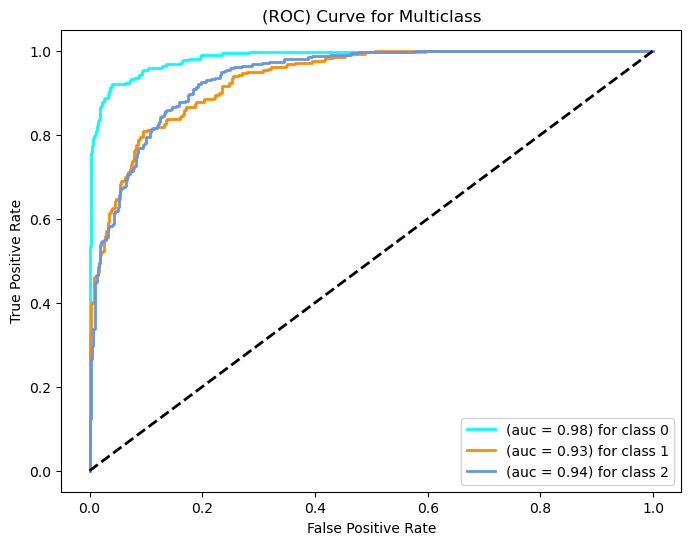

In [15]:
y_test_bin = label_binarize(y_test, classes=np.unique(y_test))

# Calculate ROC curve and AUC for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

# Get the number of classes
n_classes = y_test_bin.shape[1]
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], model.predict_proba(X_test)[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curves for each class
plt.figure(figsize=(8, 6))
colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2, label='(auc = {:.2f}) for class {}'.format(roc_auc[i], i))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('(ROC) Curve for Multiclass')
plt.legend(loc='lower right')
plt.show()


# Plot Confusion Matrix

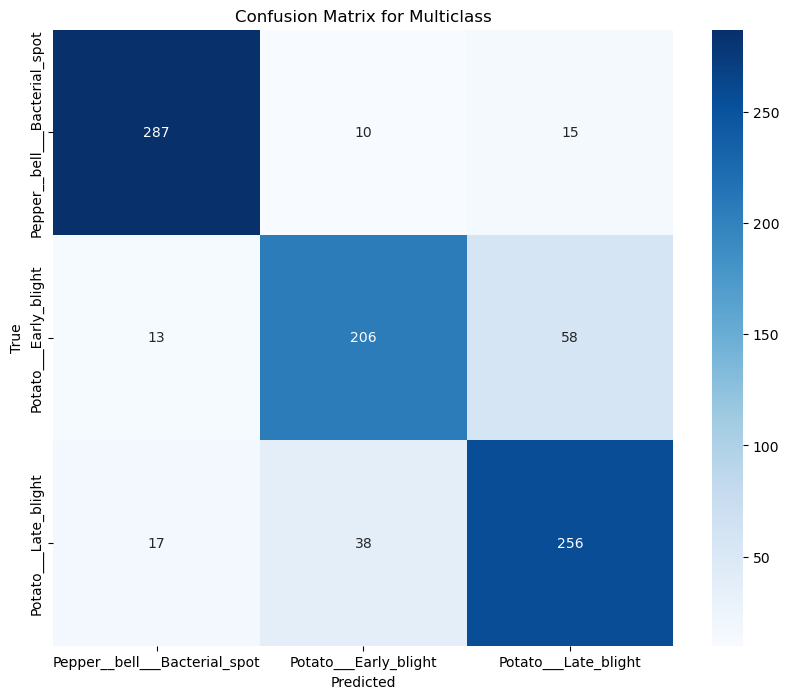

In [16]:
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix using seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for Multiclass')
plt.show()


# calculating cross validation

In [17]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_score_log=cross_val_score(model,features_array,labels_list,cv=cv)
mean_acc=np.mean(cv_score_log)
print("Cross-Validation Scores:", cv_score_log)
print("Mean Accuracy:", mean_acc)

Cross-Validation Scores: [0.82333333 0.85333333 0.82470785 0.84641068 0.83472454]
Mean Accuracy: 0.8365019476905955
